<a href="https://colab.research.google.com/github/kunaldeore2012/image_classification_model/blob/main/image_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


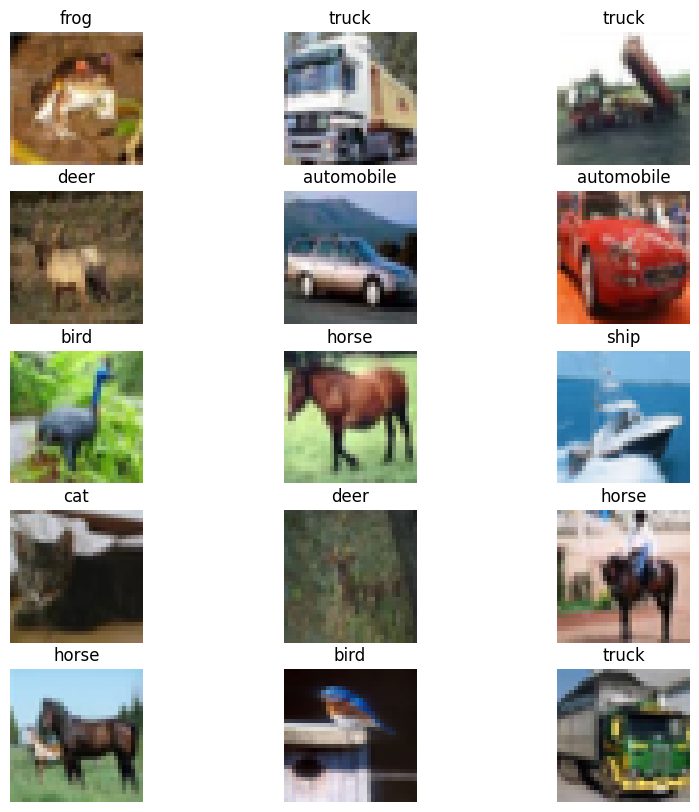

In [31]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display a few sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [32]:


# Define the input layer with shape (32, 32, 3) as the CIFAR-10 images are 32x32 RGB
input_layer = Input(shape=(32, 32, 3))

# Build the rest of the model
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10)(x)

# Create the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.3433 - loss: 1.7701 - val_accuracy: 0.5098 - val_loss: 1.3619
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.5642 - loss: 1.2269 - val_accuracy: 0.6067 - val_loss: 1.0868
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.6268 - loss: 1.0548 - val_accuracy: 0.6576 - val_loss: 0.9908
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6711 - loss: 0.9470 - val_accuracy: 0.6650 - val_loss: 0.9505
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.6999 - loss: 0.8573 - val_accuracy: 0.6834 - val_loss: 0.9076
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7192 - loss: 0.7971 - val_accuracy: 0.6746 - val_loss: 0.9196
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7381 - loss: 0.7446 - val_accuracy: 0.6945 - val_loss: 0.8824
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7483 -

313/313 - 5s - 16ms/step - accuracy: 0.1077 - loss: 2.3031


0.10769999772310257

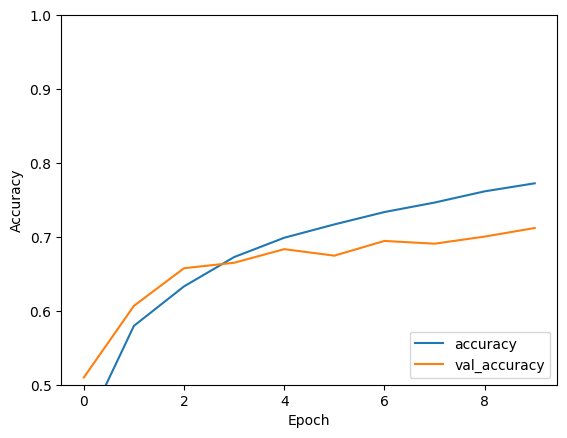

In [33]:
# test the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_acc

In [ ]:
# save the model as image_classification_model.keras and print

model.save('image_classification_model.keras')
print("Model saved as image_classification_model.keras")

Model saved as image_classification_model.keras


In [ ]:
from google.colab import files
files.download('image_classification_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>